In [ ]:
!pip install optuna

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import make_scorer,accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.svm import SVC, LinearSVC

from xgboost import XGBClassifier
import optuna
import tensorflow as tf
from mlxtend.plotting import plot_decision_regions

from warnings import simplefilter
simplefilter("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
telco = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

pd.set_option('display.max_columns',None)
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print('The dataset has {} rows and {} columns.'.format(telco.shape[0],telco.shape[1]))

The dataset has 7043 rows and 21 columns.


In [ ]:
telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
telco.duplicated().sum()

0

In [ ]:
telco.drop('customerID',axis=1,inplace=True)

In [ ]:
telco.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
telco['TotalCharges'] = telco['TotalCharges'].replace(' ','0')

In [ ]:
telco['TotalCharges'] = telco.TotalCharges.astype(float)


In [ ]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


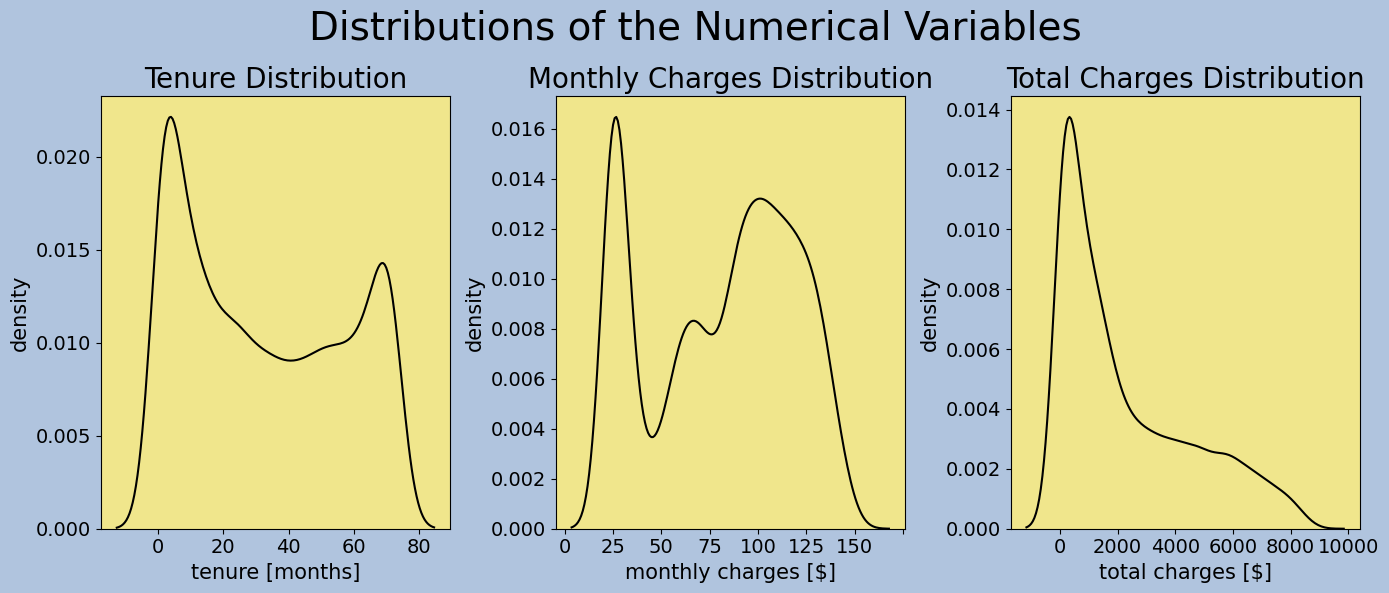

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(14,6))

ax1 = sns.distplot(telco['tenure'],color='black',hist=False,ax=ax1)
ax1.set_xlabel('tenure [months]',fontsize=15,color='black')
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')
ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=14)
ax1.set_ylabel('density',fontsize=15)
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=14)
ax1.set_title('Tenure Distribution',fontsize=20)
ax1.set_facecolor('khaki')

ax2 = sns.distplot(telco['MonthlyCharges'],color='black',hist=False,ax=ax2)
ax2.set_xlabel('monthly charges [$]',fontsize=15)
ax2.tick_params(axis='x')
ax2.tick_params(axis='y')
ax2.set_xticklabels(ax2.get_xticklabels(),fontsize=14)
ax2.set_ylabel('density',fontsize=15)
ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=14)
ax2.set_title('Monthly Charges Distribution',fontsize=20)
ax2.set_facecolor('khaki')

ax3 = sns.distplot(telco['TotalCharges'],color='black',hist=False,ax=ax3)
ax3.set_xlabel('total charges [$]',fontsize=15)
ax3.tick_params(axis='x')
ax3.tick_params(axis='y')
ax3.set_xticklabels(ax3.get_xticklabels(),fontsize=14)
ax3.set_ylabel('density',fontsize=15)
ax3.set_yticklabels(ax2.get_yticklabels(),fontsize=14)
ax3.set_title('Total Charges Distribution',fontsize=20)
ax3.set_facecolor('khaki')

fig.set_facecolor('lightsteelblue')
fig.suptitle("Distributions of the Numerical Variables",fontsize=28)

plt.tight_layout()
plt.show()


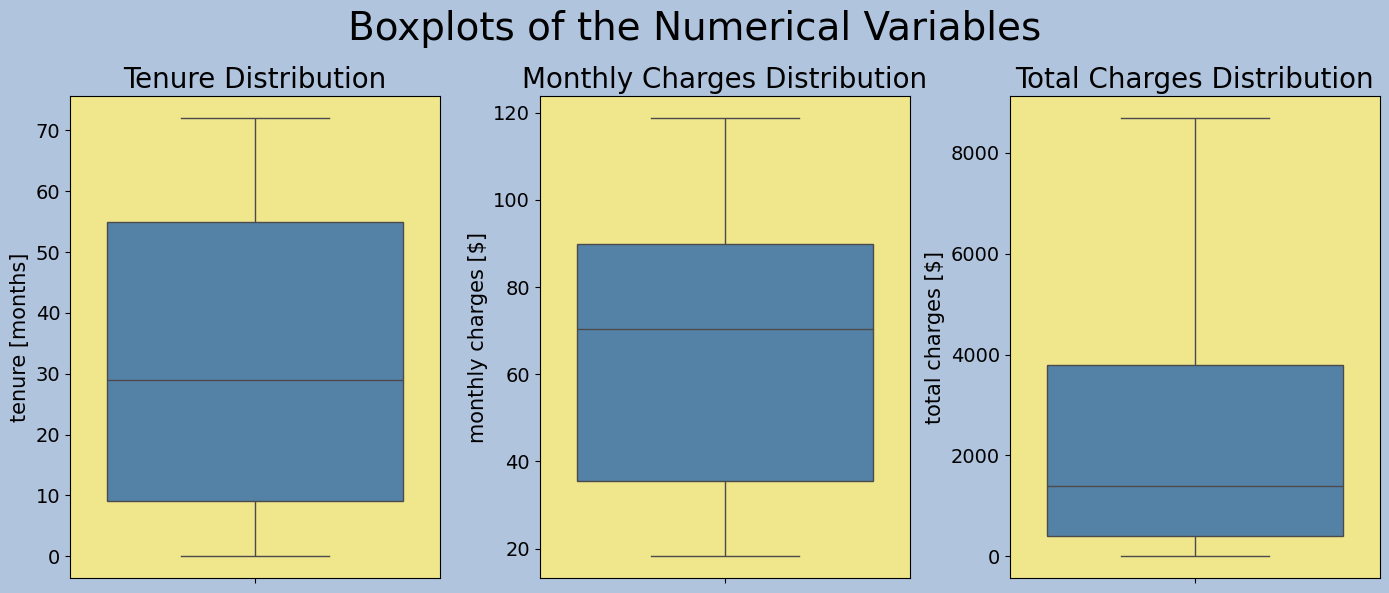

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(14,6))

ax1 = sns.boxplot(telco['tenure'],color='steelblue',ax=ax1)
ax1.set_ylabel('tenure [months]',fontsize=15)
ax1.tick_params(axis='y')
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=14)
ax1.set_title('Tenure Distribution',fontsize=20)
ax1.set_facecolor('khaki')

ax2 = sns.boxplot(telco['MonthlyCharges'],color='steelblue',ax=ax2)
ax2.set_ylabel('monthly charges [$]',fontsize=15)
ax2.tick_params(axis='y')
ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=14)
ax2.set_title('Monthly Charges Distribution',fontsize=20)
ax2.set_facecolor('khaki')

ax3 = sns.boxplot(telco['TotalCharges'],color='steelblue',ax=ax3)
ax3.set_ylabel('total charges [$]',fontsize=15)
ax3.tick_params(axis='y')
ax3.set_yticklabels(ax3.get_yticklabels(),fontsize=14)
ax3.set_title('Total Charges Distribution',fontsize=20)
ax3.set_facecolor('khaki')

fig.set_facecolor('lightsteelblue')
fig.suptitle("Boxplots of the Numerical Variables",fontsize=28)

plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

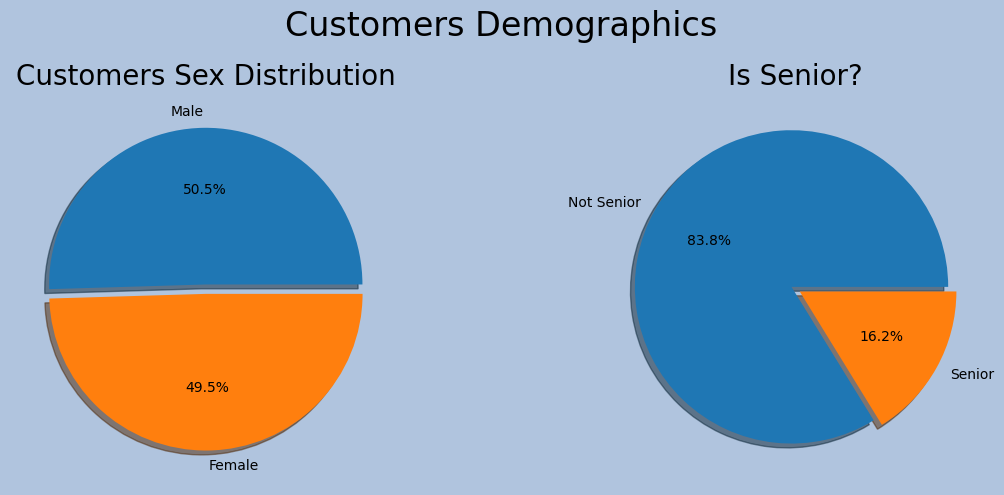

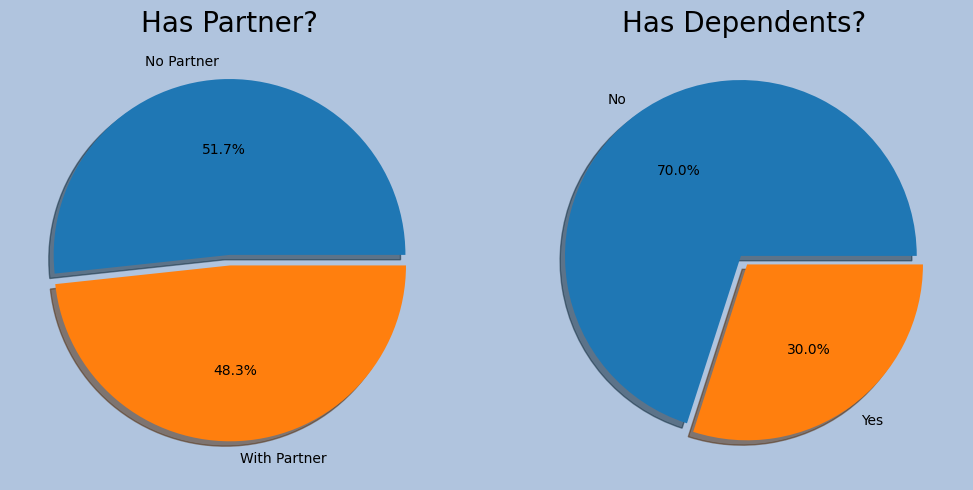

In [ ]:
val1=telco.gender.value_counts()
val2=telco.SeniorCitizen.value_counts()
val3=telco.Partner.value_counts()
val4=telco.Dependents.value_counts()

fig = plt.figure(figsize=(10,5));
(topfig,bottomfig) = fig.subfigures(2,1);

topfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4);
fig,axes = plt.subplots(1,2,figsize=(12,5));
axes[0].pie(val1,autopct="%1.1f%%",shadow=True,explode=(0.03,0.03),labels=['Male','Female'])
axes[0].set_title('Customers Sex Distribution',fontsize=20);
axes[1].pie(val2,autopct="%1.1f%%",shadow=True,explode=(0.03,0.03),labels=['Not Senior','Senior'])
axes[1].set_title('Is Senior?',fontsize=20);

fig.suptitle("Customers Demographics",fontsize=24)
fig.set_facecolor('lightsteelblue')
plt.tight_layout()

bottomfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4);
fig,axes = plt.subplots(1,2,figsize=(12,5));
axes[0].pie(val3,autopct="%1.1f%%",shadow=True,explode=(0.03,0.03),labels=['No Partner','With Partner'])
axes[0].set_title('Has Partner?',fontsize=20);
axes[1].pie(val4,autopct="%1.1f%%",shadow=True,explode=(0.03,0.03),labels=['No','Yes'])
axes[1].set_title('Has Dependents?',fontsize=20);

fig.set_facecolor('lightsteelblue')
plt.tight_layout()

plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

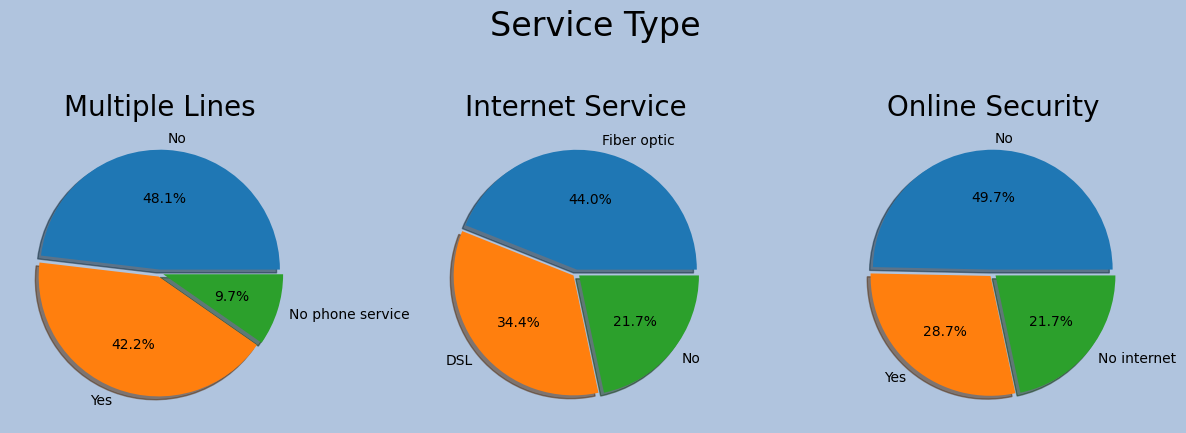

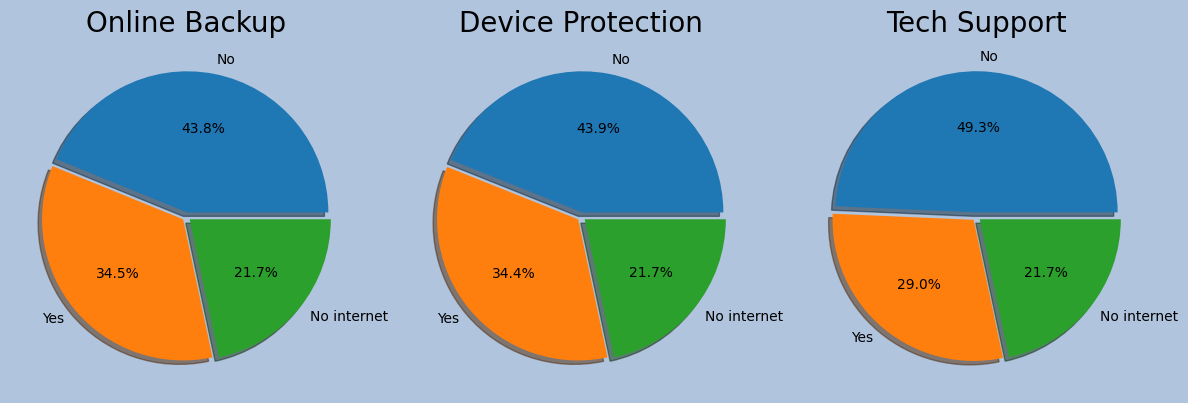

In [ ]:
val1=telco.MultipleLines.value_counts()
val2=telco.InternetService.value_counts()
val3=telco.OnlineSecurity.value_counts()
val4=telco.OnlineBackup.value_counts()
val5=telco.DeviceProtection.value_counts()
val6=telco.TechSupport.value_counts()

fig = plt.figure(figsize=(8,5));
(topfig,bottomfig) = fig.subfigures(2,1);

topfig.subplots_adjust(left=.1,right=.9,wspace=.1,hspace=.1);
fig,axes = plt.subplots(1,3,figsize=(12,5));
axes[0].pie(val1,autopct="%1.1f%%",shadow=True,explode=(0.03,0.03,0.03),labels=['No','Yes','No phone service'])
axes[0].set_title('Multiple Lines',fontsize=20);
axes[1].pie(val2,autopct="%1.1f%%",shadow=True,explode=(0.03,0.03,0.03),labels=['Fiber optic','DSL','No'])
axes[1].set_title('Internet Service',fontsize=20);
axes[2].pie(val3,autopct="%1.1f%%",shadow=True,explode=(0.03,0.03,0.03),labels=['No','Yes','No internet'])
axes[2].set_title('Online Security',fontsize=20);

fig.suptitle("Service Type",fontsize=24)
fig.set_facecolor('lightsteelblue')
plt.tight_layout()

bottomfig.subplots_adjust(left=.1,right=.9,wspace=.1,hspace=.1);
fig,axes = plt.subplots(1,3,figsize=(12,5));
axes[0].pie(val4,autopct="%1.1f%%",shadow=True,explode=(0.03,0.03,0.03),labels=['No','Yes','No internet'])
axes[0].set_title('Online Backup',fontsize=20);
axes[1].pie(val5,autopct="%1.1f%%",shadow=True,explode=(0.03,0.03,0.03),labels=['No','Yes','No internet'])
axes[1].set_title('Device Protection',fontsize=20);
axes[2].pie(val6,autopct="%1.1f%%",shadow=True,explode=(0.03,0.03,0.03),labels=['No','Yes','No internet'])
axes[2].set_title('Tech Support',fontsize=20);

fig.set_facecolor('lightsteelblue')
plt.tight_layout()

plt.tight_layout()
plt.show();

<Figure size 800x500 with 0 Axes>

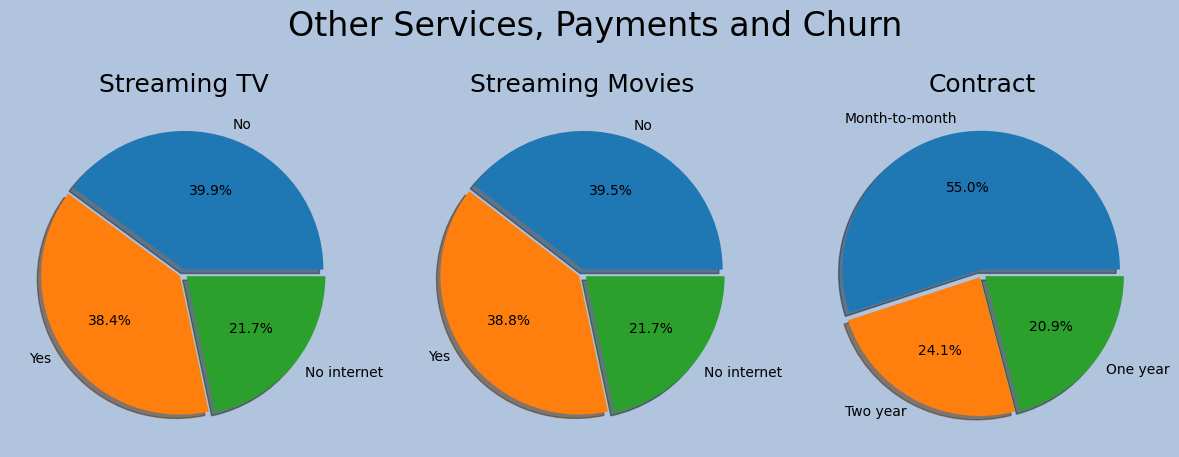

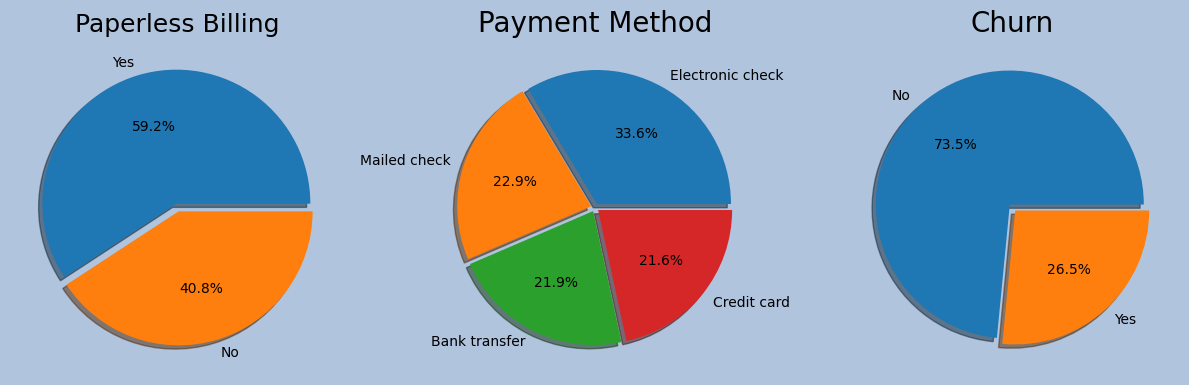

In [ ]:
val1=telco.StreamingTV.value_counts()
val2=telco.StreamingMovies.value_counts()
val3=telco.Contract.value_counts()
val4=telco.PaperlessBilling.value_counts()
val5=telco.PaymentMethod.value_counts()
val6=telco.Churn.value_counts()

fig = plt.figure(figsize=(8,5));
(topfig,bottomfig) = fig.subfigures(2,1);

topfig.subplots_adjust(left=.1,right=.9,wspace=.1,hspace=.1);
fig,axes = plt.subplots(1,3,figsize=(12,5));
axes[0].pie(val1,autopct="%1.1f%%",shadow=True,explode=(0.03,0.03,0.03),labels=['No','Yes','No internet'])
axes[0].set_title('Streaming TV',fontsize=18);
axes[1].pie(val2,autopct="%1.1f%%",shadow=True,explode=(0.03,0.03,0.03),labels=['No','Yes','No internet'])
axes[1].set_title('Streaming Movies',fontsize=18);
axes[2].pie(val3,autopct="%1.1f%%",shadow=True,explode=(0.03,0.03,0.03),labels=['Month-to-month','Two year','One year'])
axes[2].set_title('Contract',fontsize=18);

fig.suptitle("Other Services, Payments and Churn",fontsize=24)
fig.set_facecolor('lightsteelblue')
plt.tight_layout()

bottomfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4);
fig,axes = plt.subplots(1,3,figsize=(12,5));
axes[0].pie(val4,autopct="%1.1f%%",shadow=True,explode=(0.03,0.03),labels=['Yes','No'])
axes[0].set_title('Paperless Billing',fontsize=18);
axes[1].pie(val5,autopct="%1.1f%%",shadow=True,explode=(0.03,0.03,0.03,0.03),
            labels=['Electronic check','Mailed check','Bank transfer','Credit card'])
axes[1].set_title('Payment Method',fontsize=20);
axes[2].pie(val6,autopct="%1.1f%%",shadow=True,explode=(0.03,0.03),labels=['No','Yes'])
axes[2].set_title('Churn',fontsize=20);

fig.set_facecolor('lightsteelblue')
plt.tight_layout()

plt.tight_layout()
plt.show();

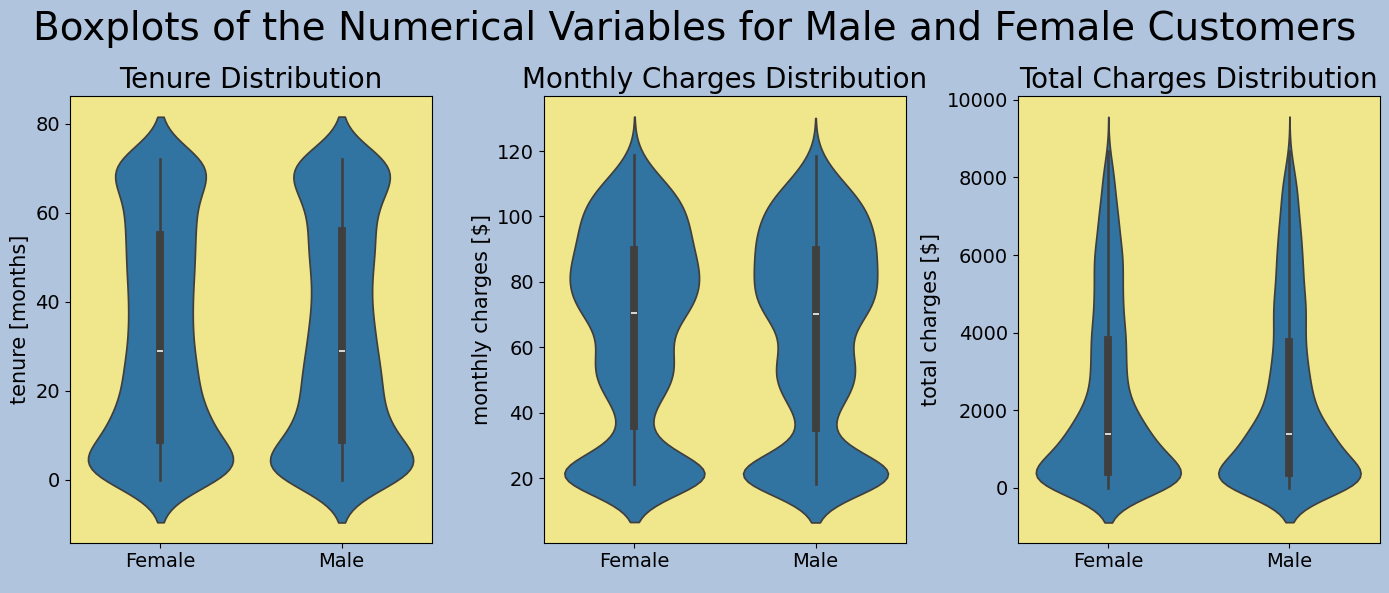

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(14,6))

ax1 = sns.violinplot(data=telco,x='gender',y='tenure',ax=ax1)
ax1.set_ylabel('tenure [months]',fontsize=15)
ax1.set_xlabel(' ',fontsize=5)
ax1.tick_params(axis='y')
ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=14)
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=14)
ax1.set_title('Tenure Distribution',fontsize=20)
ax1.set_facecolor('khaki')

ax2 = sns.violinplot(data=telco,x='gender',y='MonthlyCharges',ax=ax2)
ax2.set_ylabel('monthly charges [$]',fontsize=15)
ax2.set_xlabel(' ',fontsize=5)
ax2.tick_params(axis='y')
ax2.set_xticklabels(ax2.get_xticklabels(),fontsize=14)
ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=14)
ax2.set_title('Monthly Charges Distribution',fontsize=20)
ax2.set_facecolor('khaki')

ax3 = sns.violinplot(data=telco,x='gender',y='TotalCharges',ax=ax3)
ax3.set_ylabel('total charges [$]',fontsize=15)
ax3.set_xlabel(' ',fontsize=5)
ax3.tick_params(axis='y')
ax3.set_xticklabels(ax3.get_xticklabels(),fontsize=14)
ax3.set_yticklabels(ax3.get_yticklabels(),fontsize=14)
ax3.set_title('Total Charges Distribution',fontsize=20)
ax3.set_facecolor('khaki')

fig.set_facecolor('lightsteelblue')
fig.suptitle("Boxplots of the Numerical Variables for Male and Female Customers",fontsize=28)

plt.tight_layout()
plt.show()

In [ ]:
telco[telco['gender'] == 'Male']['tenure'].mean()

32.49535864978903

In [ ]:
telco[telco['gender'] == 'Female']['tenure'].mean()

32.24455275229358

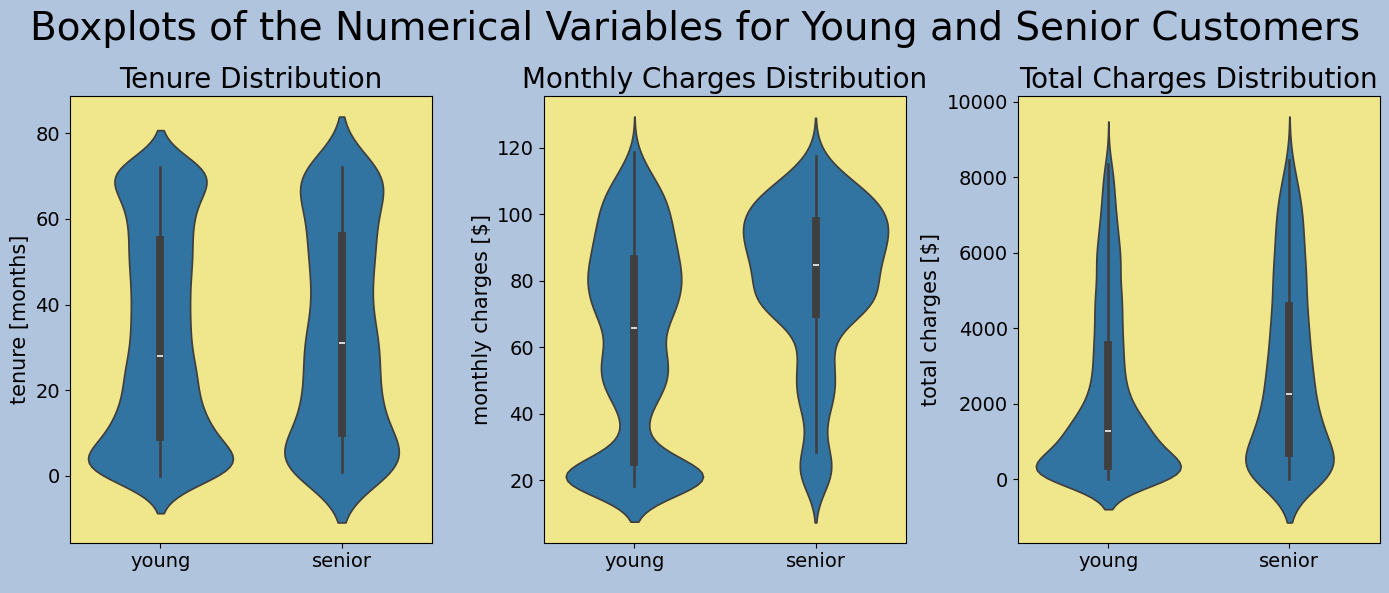

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(14,6))

ax1 = sns.violinplot(data=telco,x='SeniorCitizen',y='tenure',ax=ax1)
ax1.set_ylabel('tenure [months]',fontsize=15)
ax1.set_xticklabels(['young','senior'])
ax1.set_xlabel(' ',fontsize=5)
ax1.tick_params(axis='y')
ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=14)
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=14)
ax1.set_title('Tenure Distribution',fontsize=20)
ax1.set_facecolor('khaki')

ax2 = sns.violinplot(data=telco,x='SeniorCitizen',y='MonthlyCharges',ax=ax2)
ax2.set_ylabel('monthly charges [$]',fontsize=15)
ax2.set_xticklabels(['young','senior'])
ax2.set_xlabel(' ',fontsize=5)
ax2.tick_params(axis='y')
ax2.set_xticklabels(ax2.get_xticklabels(),fontsize=14)
ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=14)
ax2.set_title('Monthly Charges Distribution',fontsize=20)
ax2.set_facecolor('khaki')

ax3 = sns.violinplot(data=telco,x='SeniorCitizen',y='TotalCharges',ax=ax3)
ax3.set_ylabel('total charges [$]',fontsize=15)
ax3.set_xticklabels(['young','senior'])
ax3.set_xlabel(' ',fontsize=5)
ax3.tick_params(axis='y')
ax3.set_xticklabels(ax3.get_xticklabels(),fontsize=14)
ax3.set_yticklabels(ax3.get_yticklabels(),fontsize=14)
ax3.set_title('Total Charges Distribution',fontsize=20)
ax3.set_facecolor('khaki')

fig.set_facecolor('lightsteelblue')
fig.suptitle("Boxplots of the Numerical Variables for Young and Senior Customers",fontsize=28)

plt.tight_layout()
plt.show()

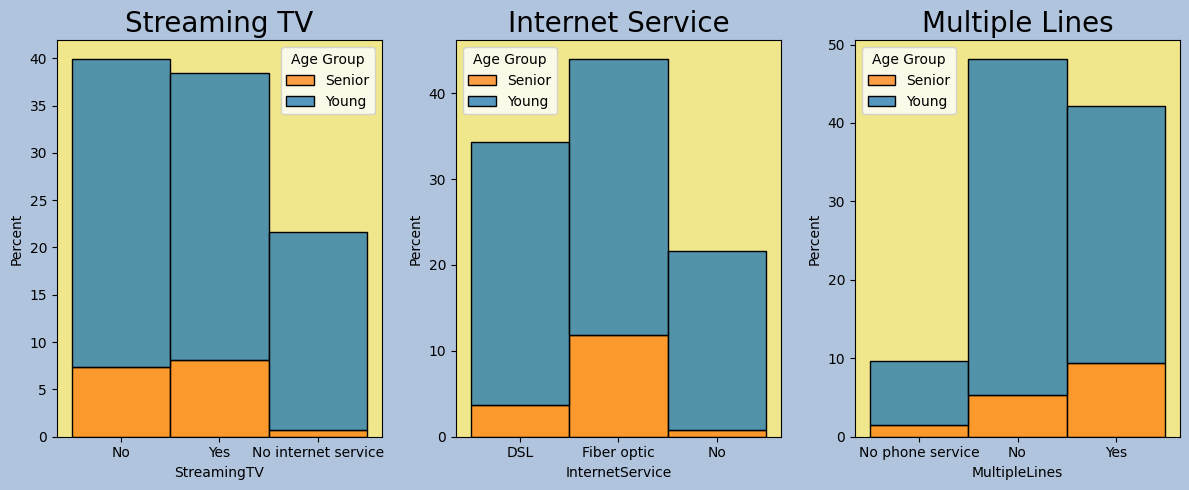

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,5))

ax1 = sns.histplot(data=telco,x='StreamingTV',multiple='stack',ax=ax1,stat='percent',hue='SeniorCitizen')
ax1.set_title('Streaming TV',fontsize=20)
ax1.set_facecolor('khaki')
ax1.legend(title='Age Group',loc='upper right',labels=['Senior','Young'])

ax2 = sns.histplot(data=telco,x='InternetService',multiple='stack',ax=ax2,stat='percent',hue='SeniorCitizen')
ax2.set_title('Internet Service',fontsize=20)
ax2.set_facecolor('khaki')
ax2.legend(title='Age Group',loc='upper left',labels=['Senior','Young'])

ax3 = sns.histplot(data=telco,x='MultipleLines',multiple='stack',ax=ax3,stat='percent',hue='SeniorCitizen')
ax3.set_title('Multiple Lines',fontsize=20)
ax3.set_facecolor('khaki')
ax3.legend(title='Age Group',loc='upper left',labels=['Senior','Young'])

plt.tight_layout()
fig.set_facecolor('lightsteelblue')

In [ ]:
telco.groupby('SeniorCitizen')['InternetService'].value_counts(normalize=True).to_frame()

proportion
SeniorCitizen InternetService            
0             Fiber optic        0.383833
              DSL                0.366379
              No                 0.249788
1             Fiber optic        0.727671
              DSL                0.226795
              No                 0.045534

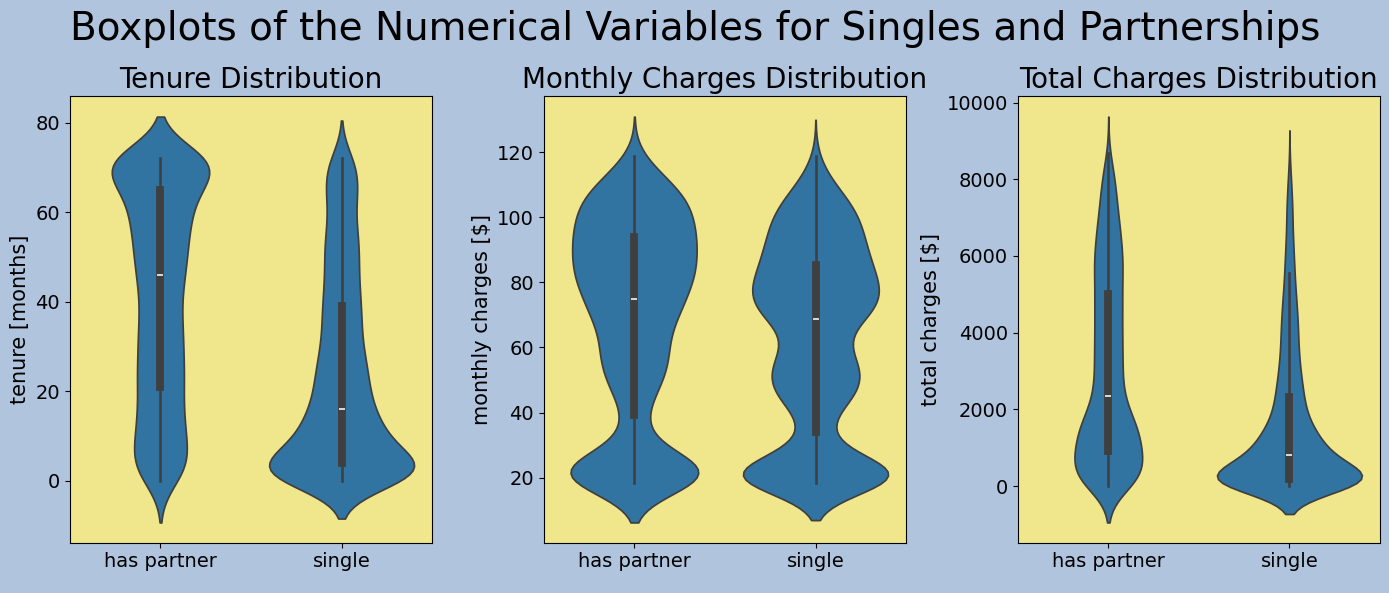

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(14,6))

ax1 = sns.violinplot(data=telco,x='Partner',y='tenure',ax=ax1)
ax1.set_ylabel('tenure [months]',fontsize=15)
ax1.set_xticklabels(['has partner','single'])
ax1.set_xlabel(' ',fontsize=5)
ax1.tick_params(axis='y')
ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=14)
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=14)
ax1.set_title('Tenure Distribution',fontsize=20)
ax1.set_facecolor('khaki')

ax2 = sns.violinplot(data=telco,x='Partner',y='MonthlyCharges',ax=ax2)
ax2.set_ylabel('monthly charges [$]',fontsize=15)
ax2.set_xticklabels(['has partner','single'])
ax2.set_xlabel(' ',fontsize=5)
ax2.tick_params(axis='y')
ax2.set_xticklabels(ax2.get_xticklabels(),fontsize=14)
ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=14)
ax2.set_title('Monthly Charges Distribution',fontsize=20)
ax2.set_facecolor('khaki')

ax3 = sns.violinplot(data=telco,x='Partner',y='TotalCharges',ax=ax3)
ax3.set_ylabel('total charges [$]',fontsize=15)
ax3.set_xticklabels(['has partner','single'])
ax3.set_xlabel(' ',fontsize=5)
ax3.tick_params(axis='y')
ax3.set_xticklabels(ax3.get_xticklabels(),fontsize=14)
ax3.set_yticklabels(ax3.get_yticklabels(),fontsize=14)
ax3.set_title('Total Charges Distribution',fontsize=20)
ax3.set_facecolor('khaki')

fig.set_facecolor('lightsteelblue')
fig.suptitle("Boxplots of the Numerical Variables for Singles and Partnerships",fontsize=28)

plt.tight_layout()
plt.show()

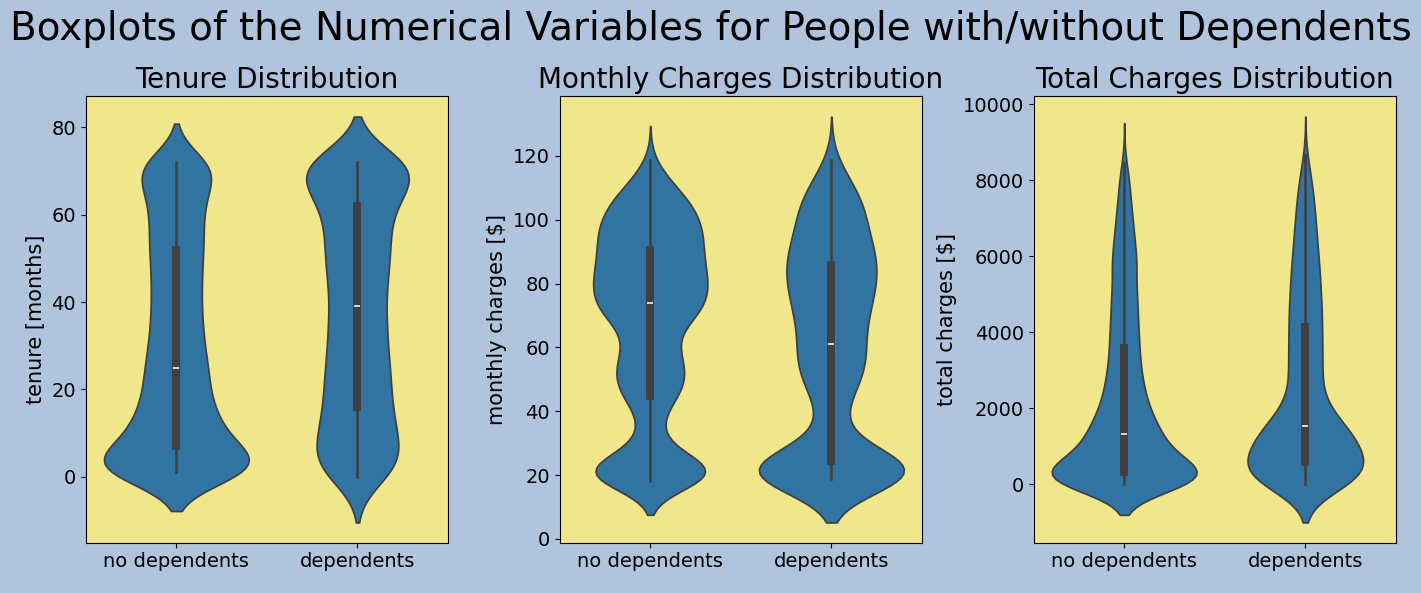

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(14,6))

ax1 = sns.violinplot(data=telco,x='Dependents',y='tenure',ax=ax1)
ax1.set_ylabel('tenure [months]',fontsize=15)
ax1.set_xticklabels(['no dependents','dependents'])
ax1.set_xlabel(' ',fontsize=5)
ax1.tick_params(axis='y')
ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=14)
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=14)
ax1.set_title('Tenure Distribution',fontsize=20)
ax1.set_facecolor('khaki')

ax2 = sns.violinplot(data=telco,x='Dependents',y='MonthlyCharges',ax=ax2)
ax2.set_ylabel('monthly charges [$]',fontsize=15)
ax2.set_xticklabels(['no dependents','dependents'])
ax2.set_xlabel(' ',fontsize=5)
ax2.tick_params(axis='y')
ax2.set_xticklabels(ax2.get_xticklabels(),fontsize=14)
ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=14)
ax2.set_title('Monthly Charges Distribution',fontsize=20)
ax2.set_facecolor('khaki')

ax3 = sns.violinplot(data=telco,x='Dependents',y='TotalCharges',ax=ax3)
ax3.set_ylabel('total charges [$]',fontsize=15)
ax3.set_xticklabels(['no dependents','dependents'])
ax3.set_xlabel(' ',fontsize=5)
ax3.tick_params(axis='y')
ax3.set_xticklabels(ax3.get_xticklabels(),fontsize=14)
ax3.set_yticklabels(ax3.get_yticklabels(),fontsize=14)
ax3.set_title('Total Charges Distribution',fontsize=20)
ax3.set_facecolor('khaki')

fig.set_facecolor('lightsteelblue')
fig.suptitle("Boxplots of the Numerical Variables for People with/without Dependents",fontsize=28)

plt.tight_layout()
plt.show()

In [ ]:
telco.groupby(["SeniorCitizen","Partner"]).size().unstack().apply(lambda x: x/x.sum(),axis=1)

Partner,No,Yes
SeniorCitizen,,
0,0.520590,0.479410
1,0.498249,0.501751


In [ ]:
telco.groupby(["Partner","Dependents"]).size().unstack().apply(lambda x: x/x.sum(),axis=1)

Dependents,No,Yes
Partner,,
No,0.900851,0.099149
Yes,0.485891,0.514109


In [ ]:
telco.groupby(["SeniorCitizen","Partner","Dependents"]).size().unstack().apply(lambda x: x/x.sum(),axis=1)

Dependents                   No       Yes
SeniorCitizen Partner                    
0             No       0.885091  0.114909
              Yes      0.411099  0.588901
1             No       0.985940  0.014060
              Yes      0.855148  0.144852

In [ ]:
katie = telco[(telco['SeniorCitizen'] == 0) & (telco['Partner'] == 'No') & (telco['Dependents'] == 'No')]

print('Tenure: {:.1f} months'.format(katie['tenure'].mean()))
print('Monthly charges: {:.1f}$'.format(katie['MonthlyCharges'].mean()))
print('Streaming TV: {}'.format(katie['StreamingTV'].mode()))
print('Internet Service: {}'.format(katie['InternetService'].mode()))

Tenure: 22.9 months
Monthly charges: 60.1$
Streaming TV: 0    No
Name: StreamingTV, dtype: object
Internet Service: 0    Fiber optic
Name: InternetService, dtype: object


In [ ]:
mike = telco[(telco['SeniorCitizen'] == 0) & (telco['Partner'] == 'Yes') & (telco['Dependents'] == 'Yes')]

print('Tenure: {:.1f} months'.format(mike['tenure'].mean()))
print('Monthly charges: {:.1f}$'.format(mike['MonthlyCharges'].mean()))
print('Streaming TV: {}'.format(mike['StreamingTV'].mode()))
print('Internet Service: {}'.format(mike['InternetService'].mode()))

Tenure: 41.1 months
Monthly charges: 59.9$
Streaming TV: 0    Yes
Name: StreamingTV, dtype: object
Internet Service: 0    DSL
Name: InternetService, dtype: object


In [ ]:
molly = telco[(telco['SeniorCitizen'] == 1) & (telco['Partner'] == 'No')]

print('Tenure: {:.1f} months'.format(molly['tenure'].mean()))
print('Monthly charges: {:.1f}$'.format(molly['MonthlyCharges'].mean()))
print('Streaming TV: {}'.format(molly['StreamingTV'].mode()))
print('Internet Service: {}'.format(molly['InternetService'].mode()))

Tenure: 25.1 months
Monthly charges: 76.8$
Streaming TV: 0    No
Name: StreamingTV, dtype: object
Internet Service: 0    Fiber optic
Name: InternetService, dtype: object


In [ ]:
joe = telco[(telco['SeniorCitizen'] == 1) & (telco['Partner'] == 'Yes')]

print('tenure: {:.1f} months'.format(joe['tenure'].mean()))
print('Monthly charges: {:.1f}$'.format(joe['MonthlyCharges'].mean()))
print('Streaming TV: {}'.format(joe['StreamingTV'].mode()))
print('Internet Service: {}'.format(joe['InternetService'].mode()))

tenure: 41.4 months
Monthly charges: 82.8$
Streaming TV: 0    Yes
Name: StreamingTV, dtype: object
Internet Service: 0    Fiber optic
Name: InternetService, dtype: object


In [ ]:
from plotly import figure_factory as FF
from plotly.offline import iplot

table_data = [['Customer Persona', 'Demographics', '', 'Tenure [months]', 'Monthly charges', 'Streaming TV', 'Internet', 'Customer value'],
              ['Katie', 'Young, no partner, no dependents', '', '23', '60$', 'No', 'Fiber', '**'],
             ['Mike', 'Young with partner and dependents', '', '41', '60$', 'Yes', 'DSL', '***'],
             ['Aunt Molly', 'Senior, no partner', '', '25', '77$', 'No', 'Fiber','***'],
             ['Grandpa Joe', 'Senior with partner', '', '41', '83$', 'Yes', 'Fiber', '****']]

# Initialize a figure with FF.create_table(table_data)
figure = FF.create_table(table_data,height_constant=30)
figure.layout.width=1500

iplot(figure)


In [ ]:
telco2 = telco.copy()

LABELS = telco2.columns

encoder = LabelEncoder()

for col in LABELS:
    if telco2[col].dtype == 'O':
        telco2[col] = encoder.fit_transform(telco2[col])

In [ ]:
X = telco2.drop('Churn',axis=1)
y = telco2['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
# Random Forest Model
random_forest = RandomForestClassifier(random_state=1,max_depth=4)
random_forest.fit(X,y)

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Contract,0.284
tenure,0.160
OnlineSecurity,0.114
TechSupport,0.099
TotalCharges,0.077
InternetService,0.061
MonthlyCharges,0.061
OnlineBackup,0.042
DeviceProtection,0.040


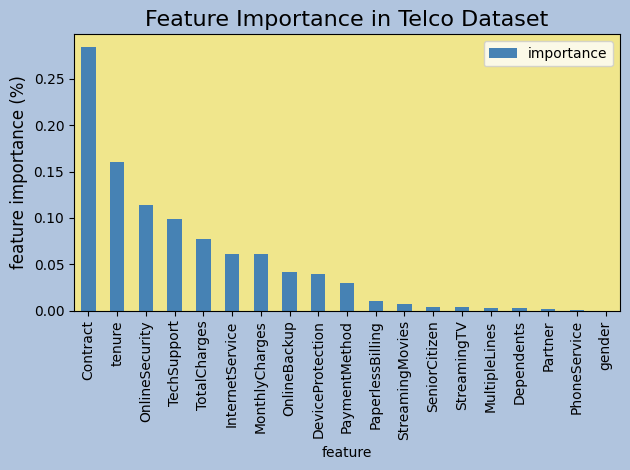

In [ ]:
importances.plot.bar(color='steelblue')

plt.ylabel('feature importance (%)',fontsize=12)
plt.title('Feature Importance in Telco Dataset',fontsize=16)

plt.tight_layout()
plt.gcf().patch.set_facecolor('lightsteelblue')
plt.gca().set_facecolor('khaki')
plt.show()

In [ ]:
linear_svc = LinearSVC(max_iter=4000)

linear_svc.fit(X_train,y_train)

# Use the model to predict on test data
linear_svc_test_preds = linear_svc.predict(X_test)

accLinSVC = accuracy_score(y_test,linear_svc_test_preds)
print('accuracy score, linear SVC: {:.3f}'.format(accLinSVC))

accuracy score, linear SVC: 0.783


In [ ]:
svc = SVC()

svc.fit(X_train,y_train)

# Use the model to predict on test data
ssvc_test_preds = svc.predict(X_test)

accSVC = accuracy_score(y_test,ssvc_test_preds)
print('accuracy score, SVC: {:.3f}'.format(accSVC))

accuracy score, SVC: 0.738


In [ ]:
random_forest = RandomForestClassifier()

random_forest.fit(X_train,y_train)

# Use the model to predict on test data
rf_test_preds = random_forest.predict(X_test)

accRF = accuracy_score(y_test,rf_test_preds)
print('accuracy score, random forest: {:.3f}'.format(accRF))

accuracy score, random forest: 0.792


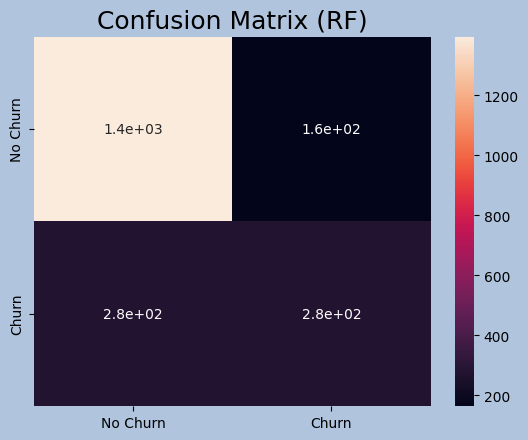

In [ ]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test,rf_test_preds,labels=random_forest.classes_)

ax = sns.heatmap(cm,annot=True)
ax.xaxis.set_ticklabels(['No Churn','Churn'])
ax.yaxis.set_ticklabels(['No Churn','Churn'])
ax.set_title('Confusion Matrix (RF)',fontsize=18)

plt.gcf().patch.set_facecolor('lightsteelblue')

In [ ]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [2,3,4,5,None],'max_features': [1.0],'max_samples': [1.0],
             'min_samples_leaf': [2,3,4],'min_samples_split': [2,2,4],'n_estimators': [200,300,400]}

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy','precision','recall','f1'}

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf,cv_params,scoring=scoring,cv=4,refit='accuracy')

In [ ]:
%%time
rf_cv.fit(X_train,y_train)

CPU times: user 22min 6s, sys: 3.06 s, total: 22min 10s
Wall time: 22min 22s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 2, 4],
                         'n_estimators': [200, 300, 400]},
             refit='accuracy',
             scoring={'f1', 'recall', 'precision', 'accuracy'})

In [ ]:
# Examine best hyperparameter combo
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
# Use the model to predict on test data
rf_test_preds = rf_cv.best_estimator_.predict(X_test)

accRFgrid = accuracy_score(y_test,rf_test_preds)
print('accuracy score, RF with GridSearch: {:.3f}'.format(accRFgrid))

accuracy score, RF with GridSearch: 0.799


In [ ]:
# Labels in y must be one-hot encoded.
y = tf.keras.utils.to_categorical(y)

# Scaling the features in X
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
classes = 2
input_size = 19
batch_size = 20
epochs = 200

In [ ]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(classes,activation='sigmoid',input_dim=input_size)
])

# Compile the model
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Fit the model
r1 = model1.fit(X_train,y_train,
                validation_data=(X_test,y_test),
                batch_size=batch_size,
                epochs=epochs)


Epoch 1/200
247/247 [==============================] - 3s 8ms/step - loss: 0.7442 - accuracy: 0.5748 - val_loss: 0.6500 - val_accuracy: 0.6853
Epoch 2/200
247/247 [==============================] - 2s 7ms/step - loss: 0.5876 - accuracy: 0.7205 - val_loss: 0.5583 - val_accuracy: 0.7307
Epoch 3/200
247/247 [==============================] - 1s 5ms/step - loss: 0.5224 - accuracy: 0.7507 - val_loss: 0.5126 - val_accuracy: 0.7601
Epoch 4/200
247/247 [==============================] - 1s 3ms/step - loss: 0.4864 - accuracy: 0.7669 - val_loss: 0.4844 - val_accuracy: 0.7757
Epoch 5/200
247/247 [==============================] - 1s 2ms/step - loss: 0.4639 - accuracy: 0.7828 - val_loss: 0.4666 - val_accuracy: 0.7847
Epoch 6/200
247/247 [==============================] - 1s 2ms/step - loss: 0.4492 - accuracy: 0.7890 - val_loss: 0.4548 - val_accuracy: 0.7903
Epoch 7/200
247/247 [==============================] - 1s 3ms/step - loss: 0.4394 - accuracy: 0.7931 - val_loss: 0.4472 - val_accuracy: 0.7927

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 40        
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluate the model
print("Train score:",model1.evaluate(X_train,y_train))
print("Test score:",model1.evaluate(X_test,y_test))

155/155 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8032
Train score: [0.41194504499435425, 0.8032454252243042]
67/67 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.7965
Test score: [0.4278431534767151, 0.7964978814125061]


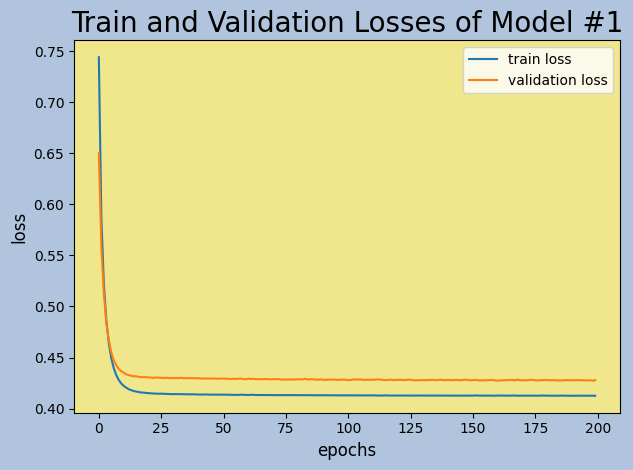

In [ ]:
plt.plot(r1.history['loss'],label='train loss')
plt.plot(r1.history['val_loss'],label='validation loss')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.legend()

plt.title('Train and Validation Losses of Model #1',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('khaki')
plt.gcf().patch.set_facecolor('lightsteelblue')

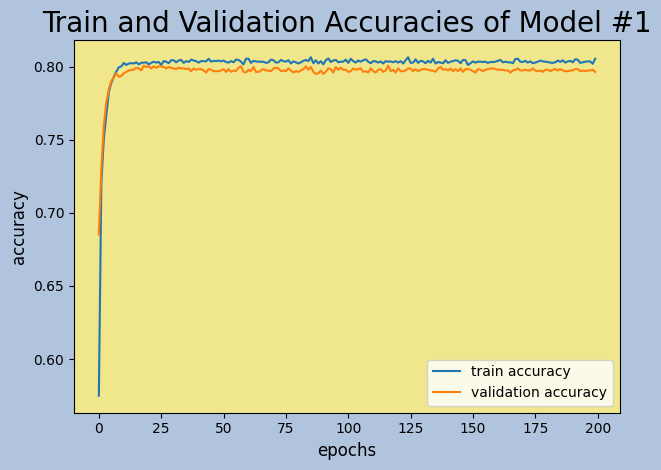

In [ ]:
plt.plot(r1.history['accuracy'],label='train accuracy')
plt.plot(r1.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('accuracy',fontsize=12)
plt.legend()

plt.title('Train and Validation Accuracies of Model #1',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('khaki')
plt.gcf().patch.set_facecolor('lightsteelblue')

In [ ]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20,activation='relu',input_dim=input_size),
  tf.keras.layers.Dense(10,activation='relu'),
  tf.keras.layers.Dense(classes,activation='sigmoid')
])

# Compile the model
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Fit the model
r2 = model2.fit(X_train,y_train,
                validation_data=(X_test,y_test),
                batch_size=batch_size,
                epochs=epochs)

Epoch 1/200
247/247 [==============================] - 5s 8ms/step - loss: 0.4999 - accuracy: 0.7414 - val_loss: 0.4581 - val_accuracy: 0.7690
Epoch 2/200
247/247 [==============================] - 2s 6ms/step - loss: 0.4352 - accuracy: 0.7872 - val_loss: 0.4458 - val_accuracy: 0.7856
Epoch 3/200
247/247 [==============================] - 1s 3ms/step - loss: 0.4217 - accuracy: 0.7947 - val_loss: 0.4415 - val_accuracy: 0.7870
Epoch 4/200
247/247 [==============================] - 1s 3ms/step - loss: 0.4151 - accuracy: 0.7998 - val_loss: 0.4391 - val_accuracy: 0.7903
Epoch 5/200
247/247 [==============================] - 1s 3ms/step - loss: 0.4111 - accuracy: 0.8045 - val_loss: 0.4365 - val_accuracy: 0.7937
Epoch 6/200
247/247 [==============================] - 1s 3ms/step - loss: 0.4086 - accuracy: 0.8063 - val_loss: 0.4363 - val_accuracy: 0.7894
Epoch 7/200
247/247 [==============================] - 1s 3ms/step - loss: 0.4061 - accuracy: 0.8063 - val_loss: 0.4362 - val_accuracy: 0.7946

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 20)                400       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 632 (2.47 KB)
Trainable params: 632 (2.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluate the model
print("Train score:",model2.evaluate(X_train,y_train))
print("Test score:",model2.evaluate(X_test,y_test))

155/155 [==============================] - 1s 4ms/step - loss: 0.3170 - accuracy: 0.8550
Train score: [0.3170214891433716, 0.8549695611000061]
67/67 [==============================] - 0s 3ms/step - loss: 0.5358 - accuracy: 0.7700
Test score: [0.5357842445373535, 0.7699952721595764]


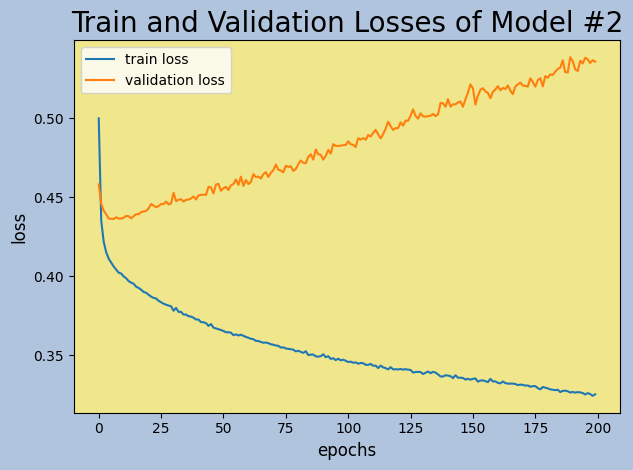

In [ ]:
plt.plot(r2.history['loss'],label='train loss')
plt.plot(r2.history['val_loss'],label='validation loss')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.legend()

plt.title('Train and Validation Losses of Model #2',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('khaki')
plt.gcf().patch.set_facecolor('lightsteelblue')

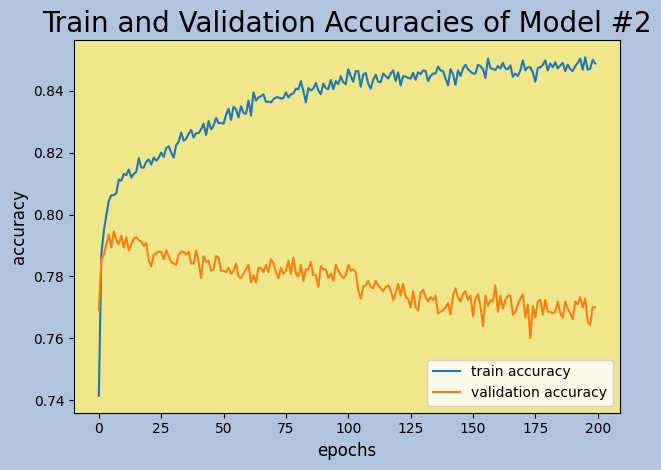

In [ ]:
plt.plot(r2.history['accuracy'],label='train accuracy')
plt.plot(r2.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('accuracy',fontsize=12)
plt.legend()

plt.title('Train and Validation Accuracies of Model #2',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('khaki')
plt.gcf().patch.set_facecolor('lightsteelblue')

In [ ]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(200,activation='relu',input_dim=input_size,kernel_regularizer=tf.keras.regularizers.l1(0.001)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(100,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(classes,activation='softmax')
])

# Compile the model
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model
r3 = model3.fit(X_train,y_train,
                validation_data=(X_test,y_test),
                batch_size=batch_size,
                epochs=epochs)

Epoch 1/200
247/247 [==============================] - 5s 9ms/step - loss: 1.6244 - accuracy: 0.7576 - val_loss: 1.1855 - val_accuracy: 0.7932
Epoch 2/200
247/247 [==============================] - 2s 6ms/step - loss: 0.9852 - accuracy: 0.7959 - val_loss: 0.8236 - val_accuracy: 0.7951
Epoch 3/200
247/247 [==============================] - 2s 6ms/step - loss: 0.7330 - accuracy: 0.7862 - val_loss: 0.6489 - val_accuracy: 0.8012
Epoch 4/200
247/247 [==============================] - 1s 6ms/step - loss: 0.6050 - accuracy: 0.7864 - val_loss: 0.5651 - val_accuracy: 0.7984
Epoch 5/200
247/247 [==============================] - 1s 4ms/step - loss: 0.5380 - accuracy: 0.7929 - val_loss: 0.5221 - val_accuracy: 0.7951
Epoch 6/200
247/247 [==============================] - 1s 3ms/step - loss: 0.5096 - accuracy: 0.7927 - val_loss: 0.5021 - val_accuracy: 0.7993
Epoch 7/200
247/247 [==============================] - 1s 3ms/step - loss: 0.4974 - accuracy: 0.7913 - val_loss: 0.4921 - val_accuracy: 0.7946

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 200)               4000      
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               20100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 2)                 202       
                                                                 
Total params: 24302 (94.93 KB)
Trainable params: 24302 (94.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluate the model
print("Train score:",model3.evaluate(X_train,y_train))
print("Test score:",model3.evaluate(X_test,y_test))

155/155 [==============================] - 1s 5ms/step - loss: 0.4380 - accuracy: 0.8110
Train score: [0.43804028630256653, 0.8109533190727234]
67/67 [==============================] - 0s 6ms/step - loss: 0.4597 - accuracy: 0.7989
Test score: [0.4597422480583191, 0.7988641858100891]


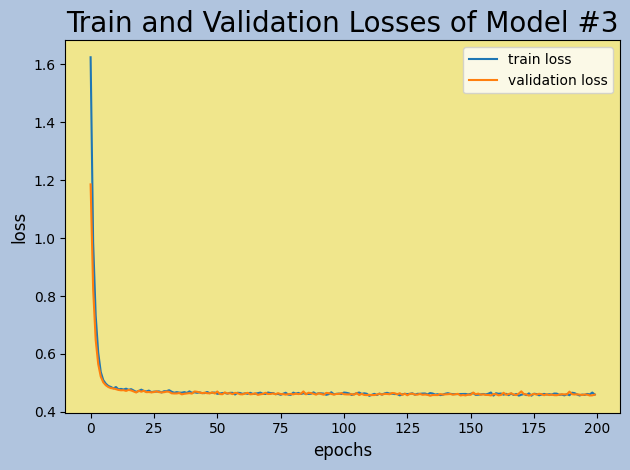

In [ ]:
plt.plot(r3.history['loss'],label='train loss')
plt.plot(r3.history['val_loss'],label='validation loss')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.legend()

plt.title('Train and Validation Losses of Model #3',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('khaki')
plt.gcf().patch.set_facecolor('lightsteelblue')

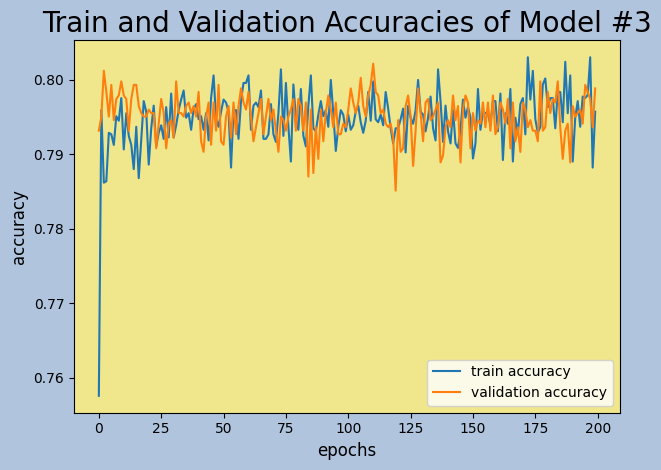

In [ ]:
plt.plot(r3.history['accuracy'],label='train accuracy')
plt.plot(r3.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('accuracy',fontsize=12)
plt.legend()

plt.title('Train and Validation Accuracies of Model #3',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('khaki')
plt.gcf().patch.set_facecolor('lightsteelblue')

155/155 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8032


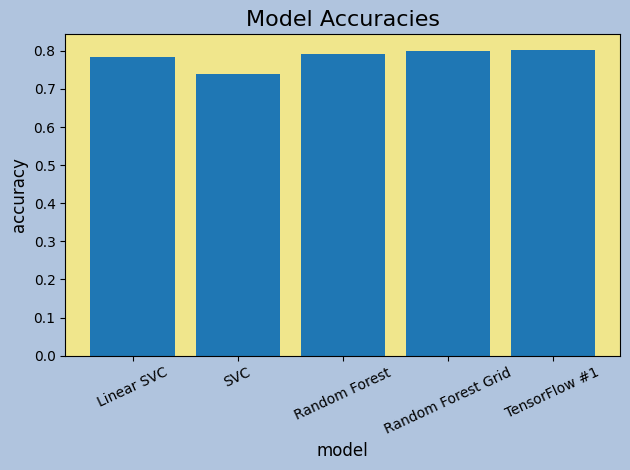

In [ ]:
models_accuracy = [accLinSVC,accSVC,accRF,accRFgrid,model1.evaluate(X_train,y_train)[1]]
models = ['Linear SVC','SVC','Random Forest','Random Forest Grid','TensorFlow #1']

plt.bar(models,models_accuracy)
plt.xlabel('model',fontsize=12)
plt.xticks(fontsize=10,rotation=25)
plt.ylabel('accuracy',fontsize=12)
plt.title('Model Accuracies',fontsize=16)

plt.tight_layout()
plt.gcf().patch.set_facecolor('lightsteelblue')
plt.gca().set_facecolor('khaki')
plt.show()


In [ ]:
# Encoding the Churn column
katie['Churn'] = encoder.fit_transform(katie['Churn'])

### katie ###
print('Contract: {}'.format(katie['Contract'].mode()))
print('Online Security: {}'.format(katie['OnlineSecurity'].mode()))
print('Tech Support: {}'.format(katie['TechSupport'].mode()))
print('Churn: {}'.format(katie['Churn'].mean()))

Contract: 0    Month-to-month
Name: Contract, dtype: object
Online Security: 0    No
Name: OnlineSecurity, dtype: object
Tech Support: 0    No
Name: TechSupport, dtype: object
Churn: 0.31151158514159616


In [ ]:
# Encoding the Churn column
mike['Churn'] = encoder.fit_transform(mike['Churn'])

### mike ###
print('Contract: {}'.format(mike['Contract'].mode()))
print('Online Security: {}'.format(mike['OnlineSecurity'].mode()))
print('Tech Support: {}'.format(mike['TechSupport'].mode()))
print('Churn: {}'.format(mike['Churn'].mean()))

Contract: 0    Two year
Name: Contract, dtype: object
Online Security: 0    Yes
Name: OnlineSecurity, dtype: object
Tech Support: 0    Yes
Name: TechSupport, dtype: object
Churn: 0.13745498199279713


In [ ]:
# Encoding the Churn column
molly['Churn'] = encoder.fit_transform(molly['Churn'])

### molly ###
print('Contract: {}'.format(molly['Contract'].mode()))
print('Online Security: {}'.format(molly['OnlineSecurity'].mode()))
print('Tech Support: {}'.format(molly['TechSupport'].mode()))
print('Churn: {}'.format(molly['Churn'].mean()))


Contract: 0    Month-to-month
Name: Contract, dtype: object
Online Security: 0    No
Name: OnlineSecurity, dtype: object
Tech Support: 0    No
Name: TechSupport, dtype: object
Churn: 0.48857644991212656


In [ ]:
# Encoding the Churn column
joe['Churn'] = encoder.fit_transform(joe['Churn'])

### joe ###
print('Contract: {}'.format(joe['Contract'].mode()))
print('Online Security: {}'.format(joe['OnlineSecurity'].mode()))
print('Tech Support: {}'.format(joe['TechSupport'].mode()))
print('Churn: {}'.format(joe['Churn'].mean()))


Contract: 0    Month-to-month
Name: Contract, dtype: object
Online Security: 0    No
Name: OnlineSecurity, dtype: object
Tech Support: 0    No
Name: TechSupport, dtype: object
Churn: 0.34554973821989526


In [ ]:
table_data = [['Customer Persona', 'Demographics', '', 'Contract', 'Tenure [months]', 'Online Security', 'Tech Support', 'Expected Churn', 'Customer value'],
             ['Katie', 'Young, no partner, no dependents', '', 'Month-to-month', '23', 'No', 'No', '0.31', '**'],
             ['Mike', 'Young with partner and dependents', '', 'Two Year', '41', 'Yes', 'Yes', '0.14', '****'],
             ['Aunt Molly', 'Senior, no partner', '', 'Month-to-month', '25', 'No', 'No', '0.49','***'],
             ['Grandpa Joe', 'Senior with partner', '', 'Month-to-month', '41', 'No', 'No', '0.35', '****']]

# Initialize a figure with FF.create_table(table_data)
figure = FF.create_table(table_data,height_constant=30)
figure.layout.width=1500

iplot(figure)